In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/apple/과실생산량_성과수미과수__1980_2021.csv', encoding='cp949')

df.columns = ['년', '지역', '면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)']

In [3]:
# 정수형으로 변환
new_df = df.replace('-', 0)
new_df[['면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)']] = new_df[['면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)']].astype(int)

# 세종시 충남 자료로 통합
new_df = new_df.replace('세종특별자치시', '충청남도')
new_df = new_df.groupby(['년', '지역'], as_index=False).sum()

In [47]:
new_df[new_df['지역']=='울산광역시']

년     지역  면적 (ha)  10a당 생산량 (kg)  생산량 (톤)
263  1998  울산광역시       27            867      234
279  1999  울산광역시       23            752      173
295  2000  울산광역시       16           1881      301
311  2001  울산광역시       13           2362      307
327  2002  울산광역시       16           2294      367
343  2003  울산광역시       16           1625      260
359  2004  울산광역시       17           1929      328
375  2005  울산광역시       18           2022      364
391  2006  울산광역시        4            669       27
407  2007  울산광역시        6            465       28
423  2008  울산광역시        1           2865       29
439  2009  울산광역시        3           1814       54
455  2010  울산광역시        1           2080       21
471  2011  울산광역시        1           1927       19
487  2012  울산광역시        2              0        0
503  2013  울산광역시        2           2460       49
519  2014  울산광역시        3           1686       51
535  2015  울산광역시        4           1995       80
551  2016  울산광역시       19           1798      342
567  2017  울산광역시       27           1194      327
583  2018  울산광역시       32            528      167
599  2019  울산광역시       29             68       19
615  2020  울산광역시       27            223       61
631  2021  울산광역시       14           1254      170

<AxesSubplot:xlabel='년', ylabel='10a당 생산량 (kg)'>

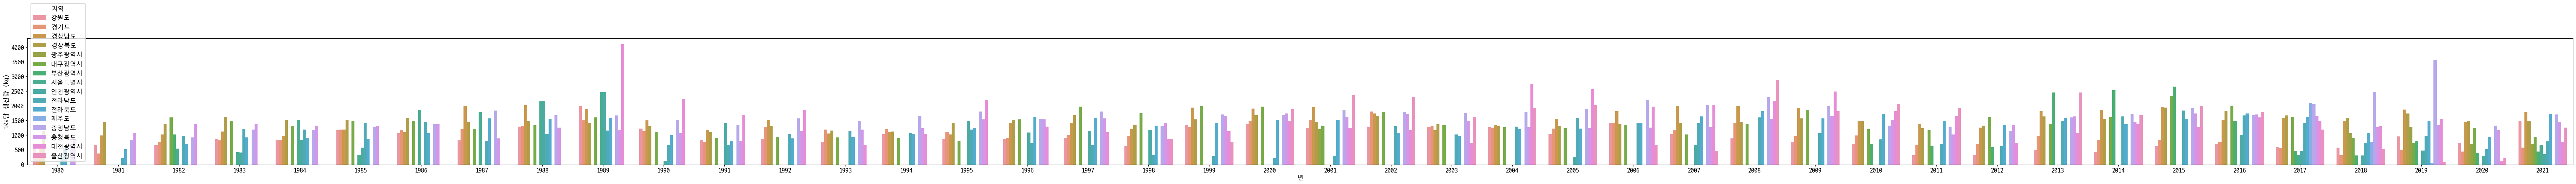

In [45]:
fig = plt.figure(figsize=(100, 5))
sns.barplot(x=new_df['년'], y=new_df['10a당 생산량 (kg)'], hue=new_df['지역'])
# plt.legend('', frameon=False)

In [ ]:
sns.barplot(x=new_df['년'], y=)

In [4]:
new_df.sample(3)

년     지역  면적 (ha)  10a당 생산량 (kg)  생산량 (톤)
317  2001   충청북도     3254           1629    53015
354  2004  광주광역시        0              0        0
356  2004  대전광역시       13           2746      357

# Merge Test

In [6]:
pressure = pd.read_csv('data/done/pressure.csv', encoding='cp949')

In [51]:
new_pressure

년     지역  평균현지기압(hPa)  평균해면기압(hPa)  최고해면기압(hPa)  최저해면기압(hPa)
0    1980    강원도       1012.0       1017.6       1028.0       1002.7
1    1980    경기도       1008.7       1013.1       1022.0        998.9
2    1980   경상남도       1016.0       1013.0       1022.5        997.9
3    1980   경상북도       1015.6       1013.9       1023.1        998.6
4    1980  광주광역시       1003.9       1012.5       1021.6        997.7
..    ...    ...          ...          ...          ...          ...
683  2022   전라남도       1012.1       1012.5       1021.3        999.0
684  2022   전라북도       1010.1       1012.3       1021.9        999.0
685  2022    제주도       1009.7       1012.1       1021.1        996.5
686  2022   충청남도       1009.9       1011.8       1021.3        998.6
687  2022   충청북도       1004.3       1011.5       1021.6        997.6

[688 rows x 6 columns]

In [7]:
## 요기 ##
new_pressure = round(pressure.groupby(['년', '지역']).mean(), 1).drop(columns='월').reset_index()

In [8]:
data = new_df.merge(new_pressure, on=['년', '지역'])

In [9]:
data.sample(3)

년    지역  면적 (ha)  10a당 생산량 (kg)  생산량 (톤)  평균현지기압(hPa)  평균해면기압(hPa)  \
321  2002  경상북도    16663           1650   274900       1011.4       1013.7   
24   1981  충청북도     7196           1077    77501       1005.0       1012.1   
269  1998  충청북도     3911           1431    55955       1005.2       1013.5   

     최고해면기압(hPa)  최저해면기압(hPa)  
321       1023.9        997.8  
24        1022.2        999.7  
269       1023.0       1000.8

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, '평균현지기압(hPa)')

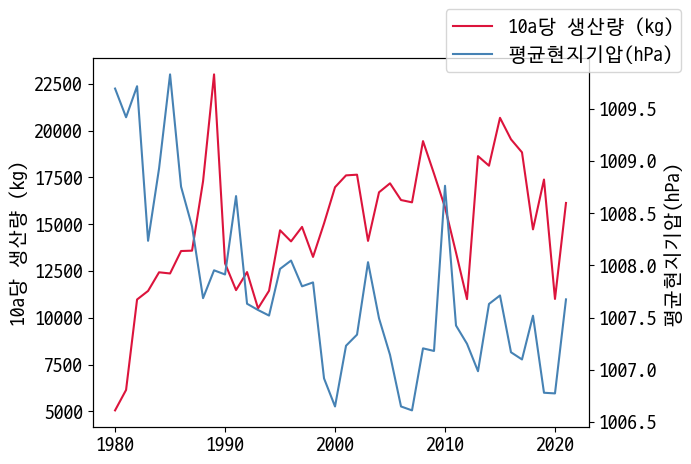

In [11]:
fig, axe1 = plt.subplots()
axe2 = axe1.twinx()

a1 = sns.lineplot(ax=axe1, x=data['년'].unique(), y=data.groupby('년')['10a당 생산량 (kg)'].sum(), color='crimson')
a2 = sns.lineplot(ax=axe2, x=data['년'].unique(), y=data.groupby('년')['평균현지기압(hPa)'].mean(), color='steelblue')

fig.legend(['10a당 생산량 (kg)', '평균현지기압(hPa)'])

axe1.set_ylabel('10a당 생산량 (kg)')
axe2.set_ylabel('평균현지기압(hPa)')

In [12]:
wind = pd.read_csv('data/done/wind_all.csv', encoding='cp949')
new_wind = round(wind.groupby(['년', '지역']).mean(), 1).drop(columns='월').reset_index()

In [13]:
data = data.merge(new_wind, on=['년', '지역'])

Text(0, 0.5, '평균풍속(m/s)')

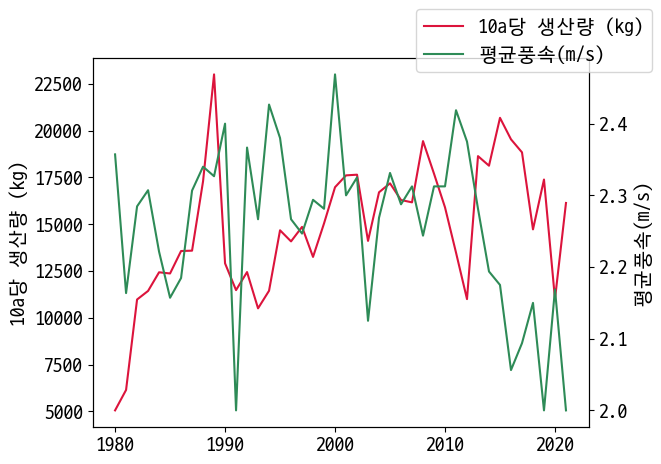

In [18]:
fig, axe1 = plt.subplots()
axe2 = axe1.twinx()

a1 = sns.lineplot(ax=axe1, x=data['년'].unique(), y=data.groupby('년')['10a당 생산량 (kg)'].sum(), color='crimson')
# a2 = sns.lineplot(ax=axe2, x=data['년'].unique(), y=data.groupby('년')['평균현지기압(hPa)'].mean(), color='steelblue')
a2 = sns.lineplot(ax=axe2, x=data['년'].unique(), y=data.groupby('년')['평균풍속(m/s)'].mean(), color='seagreen')

# fig.legend(['10a당 생산량 (kg)', '평균현지기압(hPa)', ])
fig.legend(['10a당 생산량 (kg)', '평균풍속(m/s)', ])

axe1.set_ylabel('10a당 생산량 (kg)')
# axe2.set_ylabel('평균현지기압(hPa)')
axe2.set_ylabel('평균풍속(m/s)')
